In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset

df= pd.read_csv('DATA.csv')

In [3]:
#checking head of the dataset

df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [4]:
#Shape of Dataset

df.shape

(59381, 128)

In [5]:
#Creating a dataframe with all column names, their data type, number of null values and percent of null values

info= pd.DataFrame()
info['columns']= pd.Series(df.columns)
b=[]
for i in info['columns']:
    x=df[i].dtype
    b.append(x)
info['dtype']= pd.Series(b)
c=[]
for i in info['columns']:
    y=df[i].isnull().sum()
    c.append(y)
info['null']= pd.Series(c)
info['nullpercent']=(info['null']/ df.shape[0])*100
info.head(10)

,columns,dtype,null,nullpercent
0,Id,int64,0,0.0
1,Product_Info_1,int64,0,0.0
2,Product_Info_2,object,0,0.0
3,Product_Info_3,int64,0,0.0
4,Product_Info_4,float64,0,0.0
5,Product_Info_5,int64,0,0.0
6,Product_Info_6,int64,0,0.0
7,Product_Info_7,int64,0,0.0
8,Ins_Age,float64,0,0.0
9,Ht,float64,0,0.0


In [6]:
# finding out columns with null values

info[info['null']!=0]

,columns,dtype,null,nullpercent
12,Employment_Info_1,float64,19,0.031997
15,Employment_Info_4,float64,6779,11.416110
17,Employment_Info_6,float64,10854,18.278574
29,Insurance_History_5,float64,25396,42.767889
34,Family_Hist_2,float64,28656,48.257860
35,Family_Hist_3,float64,34241,57.663226
36,Family_Hist_4,float64,19184,32.306630
37,Family_Hist_5,float64,41811,70.411411
38,Medical_History_1,float64,8889,14.969435
47,Medical_History_10,float64,58824,99.061990


In [7]:
# Removing all columns with null percent > 70%
df1= df.drop(columns=['Family_Hist_5','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32'])

In [8]:
#imputing median value in the columns with null values

Continuos=['Employment_Info_1','Employment_Info_4','Medical_History_1','Employment_Info_6','Family_Hist_4',
           'Insurance_History_5','Family_Hist_2','Family_Hist_3']
df1[Continuos] = df1[Continuos].fillna(df1[Continuos].median())

In [9]:
#checking null values if remaining

df1.isnull().sum().sum()

0

In [10]:
#dummifying product info 2

df1= pd.get_dummies(df1)

### Univariate Analysis 

##### Product Info

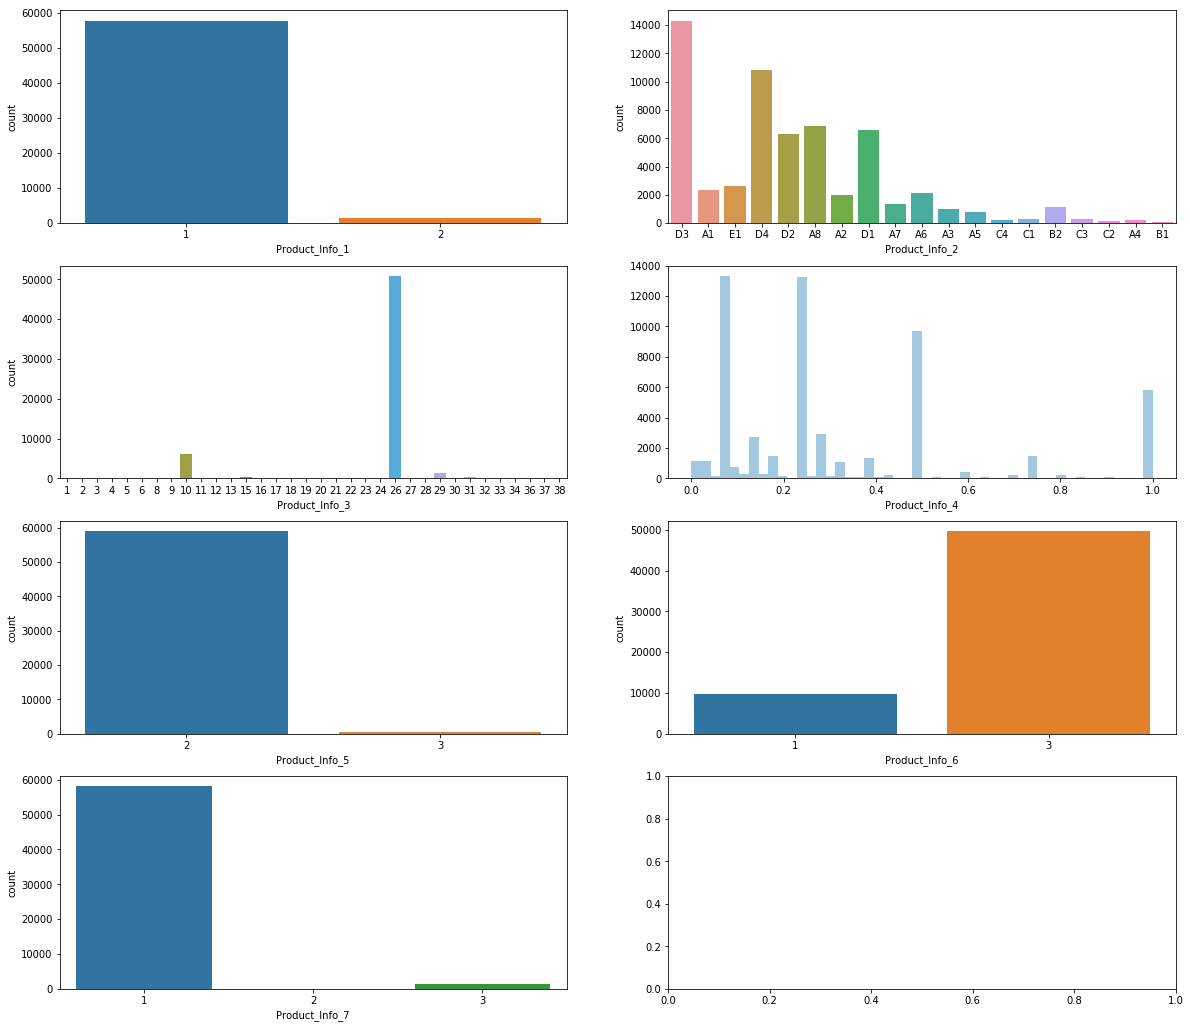

In [11]:
fig,ax=plt.subplots(4,2, figsize=(20,18))
sns.countplot(df1.Product_Info_1,ax=ax[0,0])
sns.countplot(df.Product_Info_2,ax=ax[0,1])
sns.countplot(df1.Product_Info_3,ax=ax[1,0])
sns.distplot(df1.Product_Info_4,kde= False, ax=ax[1,1])
sns.countplot(df1.Product_Info_5,ax=ax[2,0])
sns.countplot(df1.Product_Info_6,ax=ax[2,1])
sns.countplot(df1.Product_Info_7,ax=ax[3,0])
plt.show()

##### Ins Age


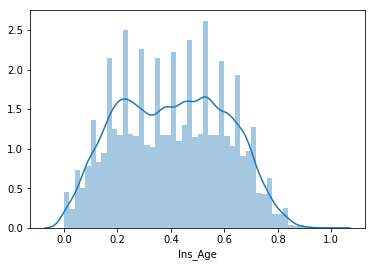

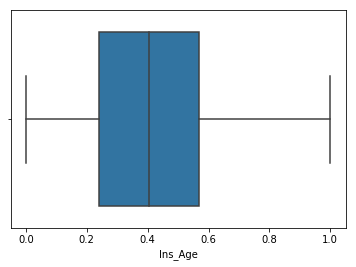

In [12]:
sns.distplot(df1.Ins_Age)
plt.show()
sns.boxplot(df1.Ins_Age)
plt.show()

##### Ht

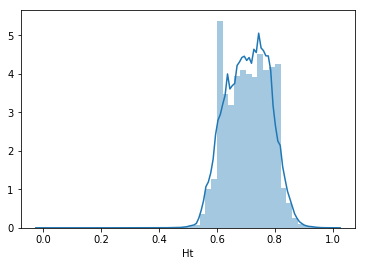

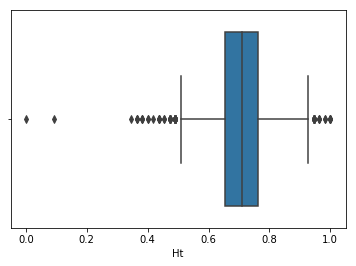

In [13]:
sns.distplot(df1.Ht)
plt.show()
sns.boxplot(df1.Ht)
plt.show()

##### Wt

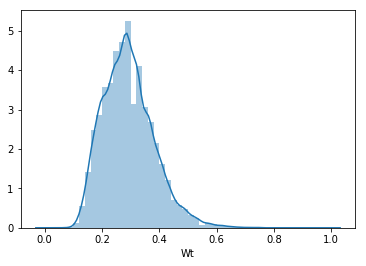

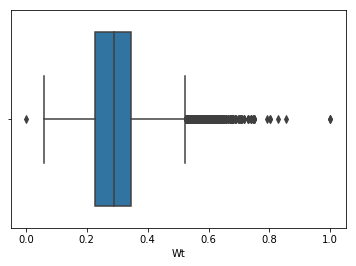

In [14]:
sns.distplot(df1.Wt)
plt.show()
sns.boxplot(df1.Wt)
plt.show()

##### BMI

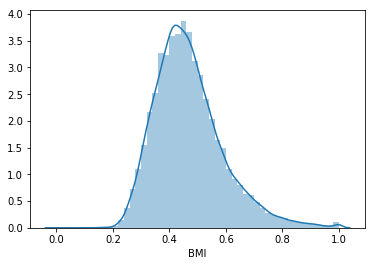

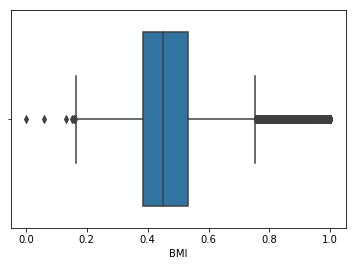

In [15]:
sns.distplot(df1.BMI)
plt.show()
sns.boxplot(df1.BMI)
plt.show()

##### Employment Info

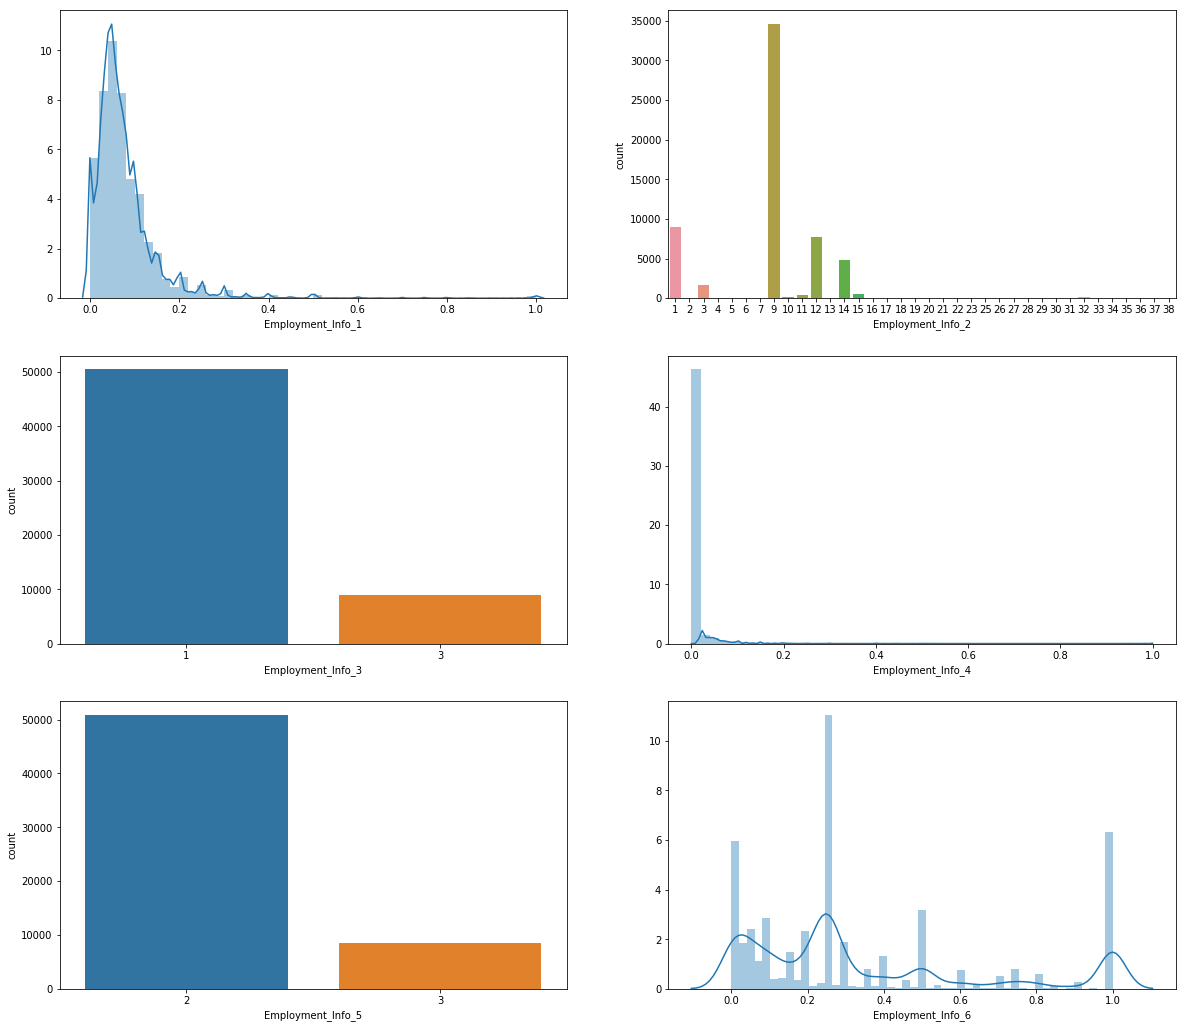

In [16]:
fig,ax=plt.subplots(3,2, figsize=(20,18))
sns.distplot(df1.Employment_Info_1,ax=ax[0,0])
sns.countplot(df.Employment_Info_2,ax=ax[0,1])
sns.countplot(df1.Employment_Info_3,ax=ax[1,0])
sns.distplot(df1.Employment_Info_4, ax=ax[1,1])
sns.countplot(df1.Employment_Info_5,ax=ax[2,0])
sns.distplot(df1.Employment_Info_6,ax=ax[2,1])
plt.show()

##### Insured Info

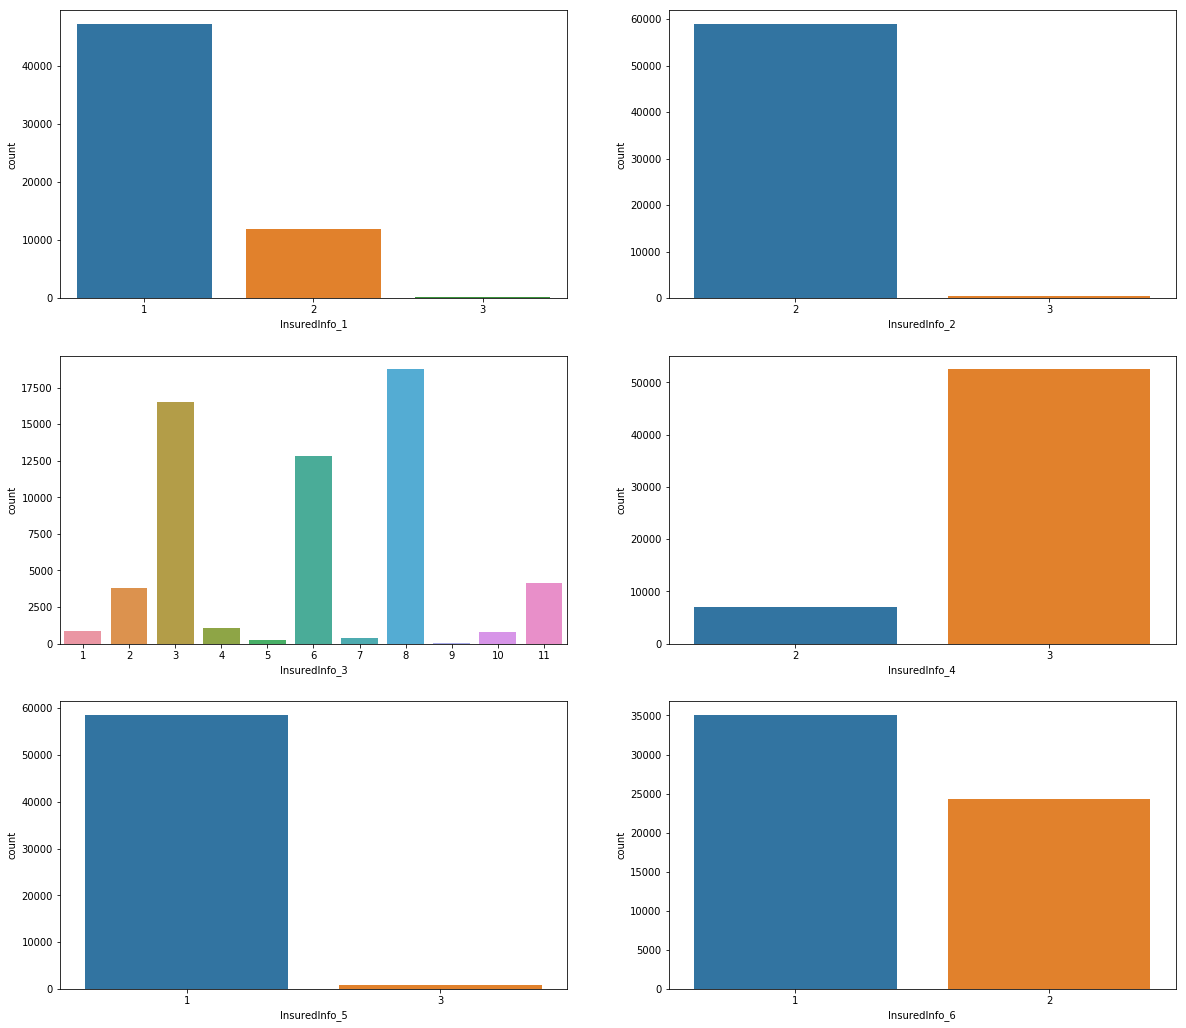

In [17]:
fig,ax=plt.subplots(3,2, figsize=(20,18))
sns.countplot(df1.InsuredInfo_1,ax=ax[0,0])
sns.countplot(df.InsuredInfo_2,ax=ax[0,1])
sns.countplot(df1.InsuredInfo_3,ax=ax[1,0])
sns.countplot(df1.InsuredInfo_4, ax=ax[1,1])
sns.countplot(df1.InsuredInfo_5,ax=ax[2,0])
sns.countplot(df1.InsuredInfo_6,ax=ax[2,1])
plt.show()

### Response 

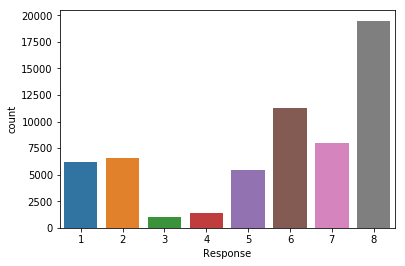

In [18]:
sns.countplot(df1.Response)
plt.show()

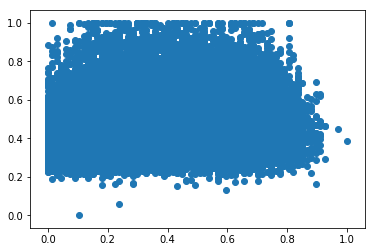

In [19]:
plt.scatter(df1.Ins_Age,df1.BMI)

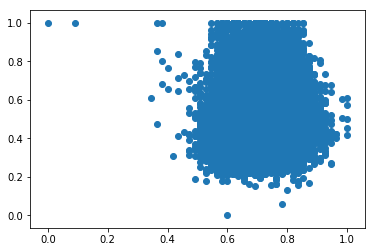

In [20]:
plt.scatter(df1.Ht,df1.BMI)

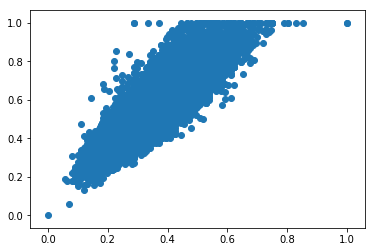

In [21]:
plt.scatter(df1.Wt,df1.BMI)

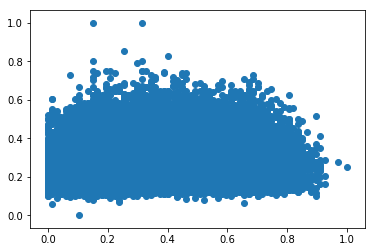

In [22]:
plt.scatter(df1.Ins_Age,df1.Wt)